In [1]:
pip install python-louvain

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import math as math
import numpy as np
import community as com
import matplotlib.cm as cm
import itertools

In [3]:
path='stack-overflow-developer-survey-2021'
public=pd.read_csv(path+'/survey_results_public.csv')

#public=pd.read_csv('./developer_survey_2021/survey_results_public.csv')


# Código

In [4]:
"""
G = nx.Graph()
for a in range(len(public)):
    nodoLenguaje = public.to_numpy()[a][26]
    
    if str(nodoLenguaje) != "nan":
        listaLenguajes = nodoLenguaje.split(';')

        # Mejor utiizar itertools.combinations() para generar combinaciones de dos elementos de una lista
        for e in itertools.combinations(listaLenguajes,2): # e es una tupla de dos lenguajes
            if G.has_edge(e[0],e[1]):
                G.edges[e[0],e[1]]['weight']+=1 # Incrementamos peso
            else:
                G.add_edge(e[0],e[1],weight=1) # Añadimos nuevo enlace y/o nodos

#Guardar grafo
nx.write_graphml(G, "grafoCompleto.graphml")
"""

#Cargar grafo
g = nx.read_graphml("grafoCompleto.graphml")
print(g.nodes,g.number_of_nodes())

['Docker', 'Git', 'Yarn', 'Kubernetes', 'Terraform', 'Unity 3D', 'Flow', 'Unreal Engine', 'Ansible', 'Deno', 'Puppet', 'Xamarin', 'Chef', 'Pulumi'] 14


### Poda del grafo

In [5]:
G = nx.Graph()
for e in itertools.combinations(g.nodes(),2): # e es una tupla de dos lenguajes
    peso = g.edges[e[0],e[1]]['weight']
    if peso > 325:
        G.add_edge(e[0],e[1],weight=peso)

print(G.nodes,G.number_of_nodes())

['Docker', 'Git', 'Yarn', 'Kubernetes', 'Terraform', 'Unity 3D', 'Flow', 'Unreal Engine', 'Ansible', 'Deno', 'Puppet', 'Xamarin', 'Chef', 'Pulumi'] 14


# Estudio del grafo

In [6]:
nx.degree(G)

DegreeView({'Docker': 12, 'Git': 13, 'Yarn': 11, 'Kubernetes': 11, 'Terraform': 7, 'Unity 3D': 7, 'Flow': 3, 'Unreal Engine': 5, 'Ansible': 8, 'Deno': 4, 'Puppet': 6, 'Xamarin': 5, 'Chef': 5, 'Pulumi': 1})

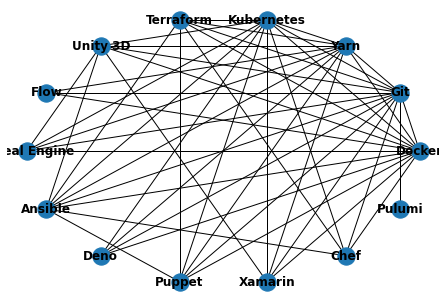

In [7]:
pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels=True, font_weight='bold')
#labels = nx.get_edge_attributes(G, 'weight')
#nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

In [8]:
"""
La densidad de un grafo es una propiedad que determina la proporción de aristas que posee. 
Un grafo denso es un grafo en el que el número de aristas es cercano al número máximo de aristas posibles, es decir, 
a las que tendría si el grafo fuera completo.
#https://es.wikipedia.org/wiki/Densidad_(teor%C3%ADa_de_grafos)
"""
#Equivale al numero de arcos de G (49) sobre g (91)
#G.number_of_edges()/g.number_of_edges()
nx.density(G)

0.5384615384615384

### Comunidades

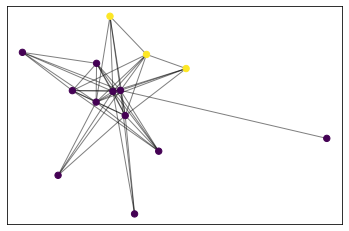

In [9]:
#first compute the best partition
partition = com.best_partition(G)

# draw the graph
pos = nx.spring_layout(G)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=40,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

In [10]:
partition

{'Docker': 0,
 'Git': 0,
 'Yarn': 0,
 'Kubernetes': 0,
 'Terraform': 0,
 'Unity 3D': 1,
 'Flow': 0,
 'Unreal Engine': 1,
 'Ansible': 0,
 'Deno': 0,
 'Puppet': 0,
 'Xamarin': 1,
 'Chef': 0,
 'Pulumi': 0}

### Transitividad

In [11]:
nx.transitivity(G)

0.6666666666666666

In [12]:
nx.average_clustering(G)

0.7707375957375957

In [13]:
#PageRank computes a ranking of the nodes in the graph G based on the structure of the incoming links.
#https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.link_analysis.pagerank_alg.pagerank.html#networkx.algorithms.link_analysis.pagerank_alg.pagerank
nx.pagerank(G)

{'Docker': 0.22040227654606973,
 'Git': 0.2652659725660915,
 'Yarn': 0.0986640181668504,
 'Kubernetes': 0.10955126369903413,
 'Terraform': 0.05938549027506579,
 'Unity 3D': 0.05034305726145276,
 'Flow': 0.01546679702191777,
 'Unreal Engine': 0.02621202976843169,
 'Ansible': 0.05818837140067641,
 'Deno': 0.01755534326272263,
 'Puppet': 0.02228413464255611,
 'Xamarin': 0.025865879911346982,
 'Chef': 0.019199262380175233,
 'Pulumi': 0.011616103097609022}

In [14]:
nx.degree_centrality(G)

{'Docker': 0.9230769230769231,
 'Git': 1.0,
 'Yarn': 0.8461538461538463,
 'Kubernetes': 0.8461538461538463,
 'Terraform': 0.5384615384615385,
 'Unity 3D': 0.5384615384615385,
 'Flow': 0.23076923076923078,
 'Unreal Engine': 0.38461538461538464,
 'Ansible': 0.6153846153846154,
 'Deno': 0.3076923076923077,
 'Puppet': 0.46153846153846156,
 'Xamarin': 0.38461538461538464,
 'Chef': 0.38461538461538464,
 'Pulumi': 0.07692307692307693}

In [15]:
#Betweenness centrality is a way of detecting the amount of influence a node has over the flow of information in a graph.
#https://neo4j.com/docs/graph-data-science/1.8/algorithms/betweenness-centrality/
nx.betweenness_centrality(G)

{'Docker': 0.10662393162393159,
 'Git': 0.2604700854700855,
 'Yarn': 0.07905982905982904,
 'Kubernetes': 0.06602564102564101,
 'Terraform': 0.005128205128205128,
 'Unity 3D': 0.007692307692307694,
 'Flow': 0.0,
 'Unreal Engine': 0.0,
 'Ansible': 0.013461538461538462,
 'Deno': 0.0,
 'Puppet': 0.0,
 'Xamarin': 0.0,
 'Chef': 0.0,
 'Pulumi': 0.0}

In [16]:
#Closeness centrality is a way of detecting nodes that are able to spread information very efficiently through a graph.
#https://neo4j.com/docs/graph-data-science/1.8/algorithms/closeness-centrality/
nx.closeness_centrality(G)

{'Docker': 0.9285714285714286,
 'Git': 1.0,
 'Yarn': 0.8666666666666667,
 'Kubernetes': 0.8666666666666667,
 'Terraform': 0.6842105263157895,
 'Unity 3D': 0.6842105263157895,
 'Flow': 0.5652173913043478,
 'Unreal Engine': 0.6190476190476191,
 'Ansible': 0.7222222222222222,
 'Deno': 0.5909090909090909,
 'Puppet': 0.65,
 'Xamarin': 0.6190476190476191,
 'Chef': 0.6190476190476191,
 'Pulumi': 0.52}

In [17]:
"""
Eigenvector Centrality is an algorithm that measures the transitive influence of nodes. 
Relationships originating from high-scoring nodes contribute more to the score of a node than connections from 
low-scoring nodes. A high eigenvector score means that a node is connected to many nodes who themselves have high scores.
"""
#https://neo4j.com/docs/graph-data-science/1.8/algorithms/eigenvector-centrality/
nx.eigenvector_centrality(G)

{'Docker': 0.3731694242972743,
 'Git': 0.378102029421062,
 'Yarn': 0.3513678088145499,
 'Kubernetes': 0.35878471527109557,
 'Terraform': 0.2663814144795854,
 'Unity 3D': 0.2627948537677635,
 'Flow': 0.13333931086241538,
 'Unreal Engine': 0.20850516114331288,
 'Ansible': 0.29473202119119296,
 'Deno': 0.1767261722599346,
 'Puppet': 0.24457979899686094,
 'Xamarin': 0.20850516114331288,
 'Chef': 0.20208980836478713,
 'Pulumi': 0.045722912414175094}

In [25]:
pesos = {}
for edge in G.edges():
    peso = G[edge[0]][edge[1]]['weight']
    pesos[edge] = peso
    
#pesos

In [19]:
degree=np.array([x[1] for x in G.degree()])
gradoMed=0
cont=0
for i in degree:
    gradoMed+=i
    cont+=1
gradoMed=gradoMed/cont
print(len(G.edges())/len(G.nodes()))
print("El grado medio es:",gradoMed)
print("El máximo grado es:",degree.max())
print("El mínimo grado es:",degree.min())

3.5
El grado medio es: 7.0
El máximo grado es: 13
El mínimo grado es: 1


Text(0.5, 1.0, 'degree distribution')

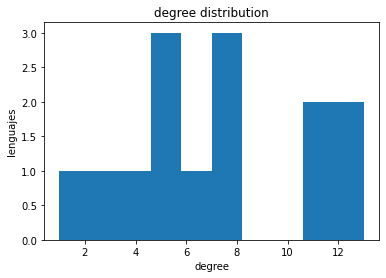

In [20]:
(n,x,p)=plt.hist(degree)
plt.xlabel('degree')
plt.ylabel('lenguajes')
plt.title('degree distribution')

In [21]:
def calculaModularidad(G, particion):
    valor = 0
    i=0
    lista = []
    for i in particion:
        for j in i:
            lista.append(j)
    
    if len(lista)==len(G.nodes()) and len(particion)==1:
        return 0
    elif len(lista) == 1:
        valor = -1/math.pow(2*len(G.edges()),2)
        suma=0
        for i in lista:
            suma+=math.pow(G.degree(i),2)
        return(suma*valor)
    else:
        suma=0
        x=0
        for i in particion:
            long=len(i)
            valA = long/len(G.edges())
            se = set()
            for j in i:
                se.add(j[0])
                se.add(j[1])
            
            su=0
            for s in se:
                su+=G.degree(s)
            valB=su/(2*len(G.edges()))
            
            valB = math.pow(valB,2)
            x = valA - valB
            suma+=x
        return suma

In [22]:
for nodo in G.nodes():
    print("La modularidad correspondiente al nodo", nodo ,"es:",calculaModularidad(G,[{nodo}]))

La modularidad correspondiente al nodo Docker es: -0.01499375260308205
La modularidad correspondiente al nodo Git es: -0.01759683465222824
La modularidad correspondiente al nodo Yarn es: -0.012598917117867555
La modularidad correspondiente al nodo Kubernetes es: -0.012598917117867555
La modularidad correspondiente al nodo Terraform es: -0.005102040816326531
La modularidad correspondiente al nodo Unity 3D es: -0.005102040816326531
La modularidad correspondiente al nodo Flow es: -0.0009371095376926281
La modularidad correspondiente al nodo Unreal Engine es: -0.0026030820491461893
La modularidad correspondiente al nodo Ansible es: -0.006663890045814244
La modularidad correspondiente al nodo Deno es: -0.001665972511453561
La modularidad correspondiente al nodo Puppet es: -0.0037484381507705126
La modularidad correspondiente al nodo Xamarin es: -0.0026030820491461893
La modularidad correspondiente al nodo Chef es: -0.0026030820491461893
La modularidad correspondiente al nodo Pulumi es: -0.0

In [23]:
#https://programminghistorian.org/es/lecciones/crear-y-ver-archivos-html-con-python
#https://docs.python.org/es/3/library/webbrowser.html
#https://www.geeksforgeeks.org/creating-and-viewing-html-files-with-python/
#https://www.geeksforgeeks.org/how-to-write-to-an-html-file-in-python/
#https://pandas.pydata.org/docs/user_guide/index.html
#https://networkx.org/documentation/stable/tutorial.html
#https://www.ellaberintodefalken.com/2020/02/grafos-con-networkx.html //guardar grafos para no cargarlos desde 0
#https://www.codegrepper.com/code-examples/python/frameworks/file-path-in-python/networkx+draw+graph+with+weight //peso de los arcos

import webbrowser

f = open('holamundo.html','w')

mensaje = """<html>
<head>HEAD</head>
<body><p>Hola Mundo!</p></body>
</html>"""

mensaje2 = """<html>
<head>HEAD</head>
<body><p>Hola Mundo2!</p></body>
</html>"""

f.write(mensaje)
f.write(mensaje2)
f.close()

#webbrowser.open_new_tab('holamundo.html')